<a href="https://colab.research.google.com/github/MuhammadJundullah/Data-Analysis/blob/main/Car%20Sales%20Analysis/Car_sales_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount ('/content/gdrive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/gdrive


## EDA (Exploratory Data Analysis)

In [2]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Car Sales_Dataset/Car_Sales.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


### Jumlah data

In [3]:
df.shape

(23906, 16)

### Menghapus kolom yang tidak di gunakan dalam analisis

In [4]:
df.drop(columns=(['Car_id','Phone', 'Customer Name']), inplace=True)
df.head(2)

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region
0,1/2/2022,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown
1,1/2/2022,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora


In [5]:
df.isna().sum()

Date             0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Dealer_Region    0
dtype: int64

### Mengidentifikasi data dulpikat

In [6]:
df.duplicated().sum()

0

### Menyesuaikan tipe data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Gender         23906 non-null  object
 2   Annual Income  23906 non-null  int64 
 3   Dealer_Name    23906 non-null  object
 4   Company        23906 non-null  object
 5   Model          23906 non-null  object
 6   Engine         23906 non-null  object
 7   Transmission   23906 non-null  object
 8   Color          23906 non-null  object
 9   Price ($)      23906 non-null  int64 
 10  Dealer_No      23906 non-null  object
 11  Body Style     23906 non-null  object
 12  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.4+ MB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

### Melihat Outliers

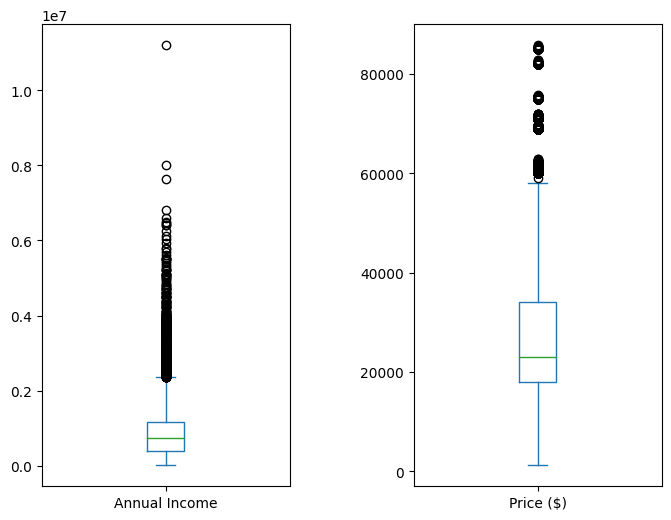

In [9]:
df.select_dtypes(include=['int','float']).plot(subplots=True, layout=(1,2), kind='box', figsize=(8,6))
plt.subplots_adjust(wspace=0.5)

In [10]:
df.head(2)

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region
0,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown
1,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora


### Tren Pernjualan Berdasarkan Beberapa Kategori

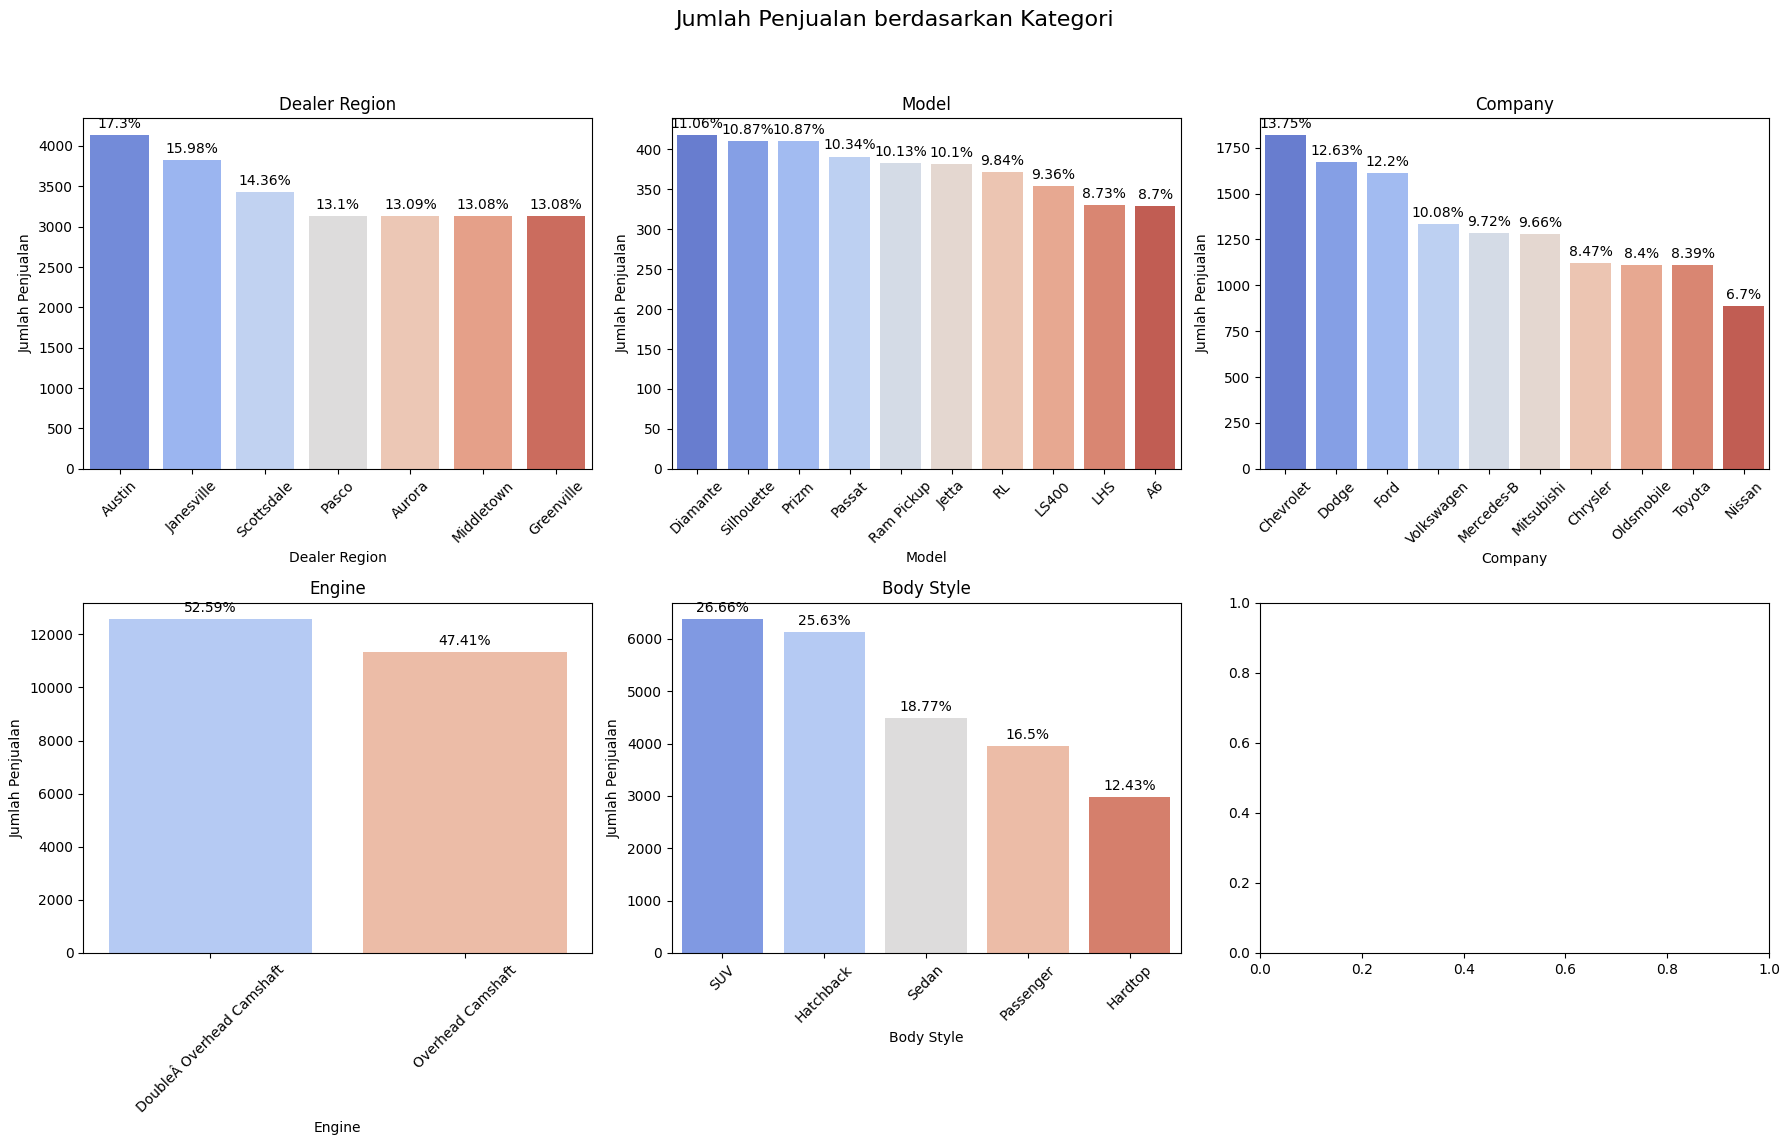

In [11]:
def top_10_counts(df, column_name):
    top_10 = df[column_name].value_counts().head(10)
    total = top_10.sum()
    percentages = (top_10 / total * 100).round(2)
    return top_10, percentages

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=False)
fig.suptitle('Jumlah Penjualan berdasarkan Kategori', fontsize=16)

def plot_bar(ax, top_data, percentages, title):
    sns.barplot(x=top_data.index, y=top_data.values, ax=ax, palette='coolwarm')
    ax.set_title(title)
    ax.set_xlabel(title)
    ax.set_ylabel('Jumlah Penjualan')
    ax.tick_params(axis='x', rotation=45)
    for p, perc in zip(ax.patches, percentages):
        ax.annotate(f'{perc}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Dealer Region
top_dealer_region, perc_dealer_region = top_10_counts(df, 'Dealer_Region')
plot_bar(axes[0, 0], top_dealer_region, perc_dealer_region, 'Dealer Region')

# Model
top_model, perc_model = top_10_counts(df, 'Model')
plot_bar(axes[0, 1], top_model, perc_model, 'Model')

# Company
top_company, perc_company = top_10_counts(df, 'Company')
plot_bar(axes[0, 2], top_company, perc_company, 'Company')

# Engine
top_engine, perc_engine = top_10_counts(df, 'Engine')
plot_bar(axes[1, 0], top_engine, perc_engine, 'Engine')

# Body Style
top_body_style, perc_body_style = top_10_counts(df, 'Body Style')
plot_bar(axes[1, 1], top_body_style, perc_body_style, 'Body Style')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Penjualan terbanyak terletak di wilayah Austin kemudian diikuti Janesville, Scottsdale, Pasco, Aurora, Middletown dan Greenville.

### Trend Penjualan Berdasarkan Model per Dealer Region.

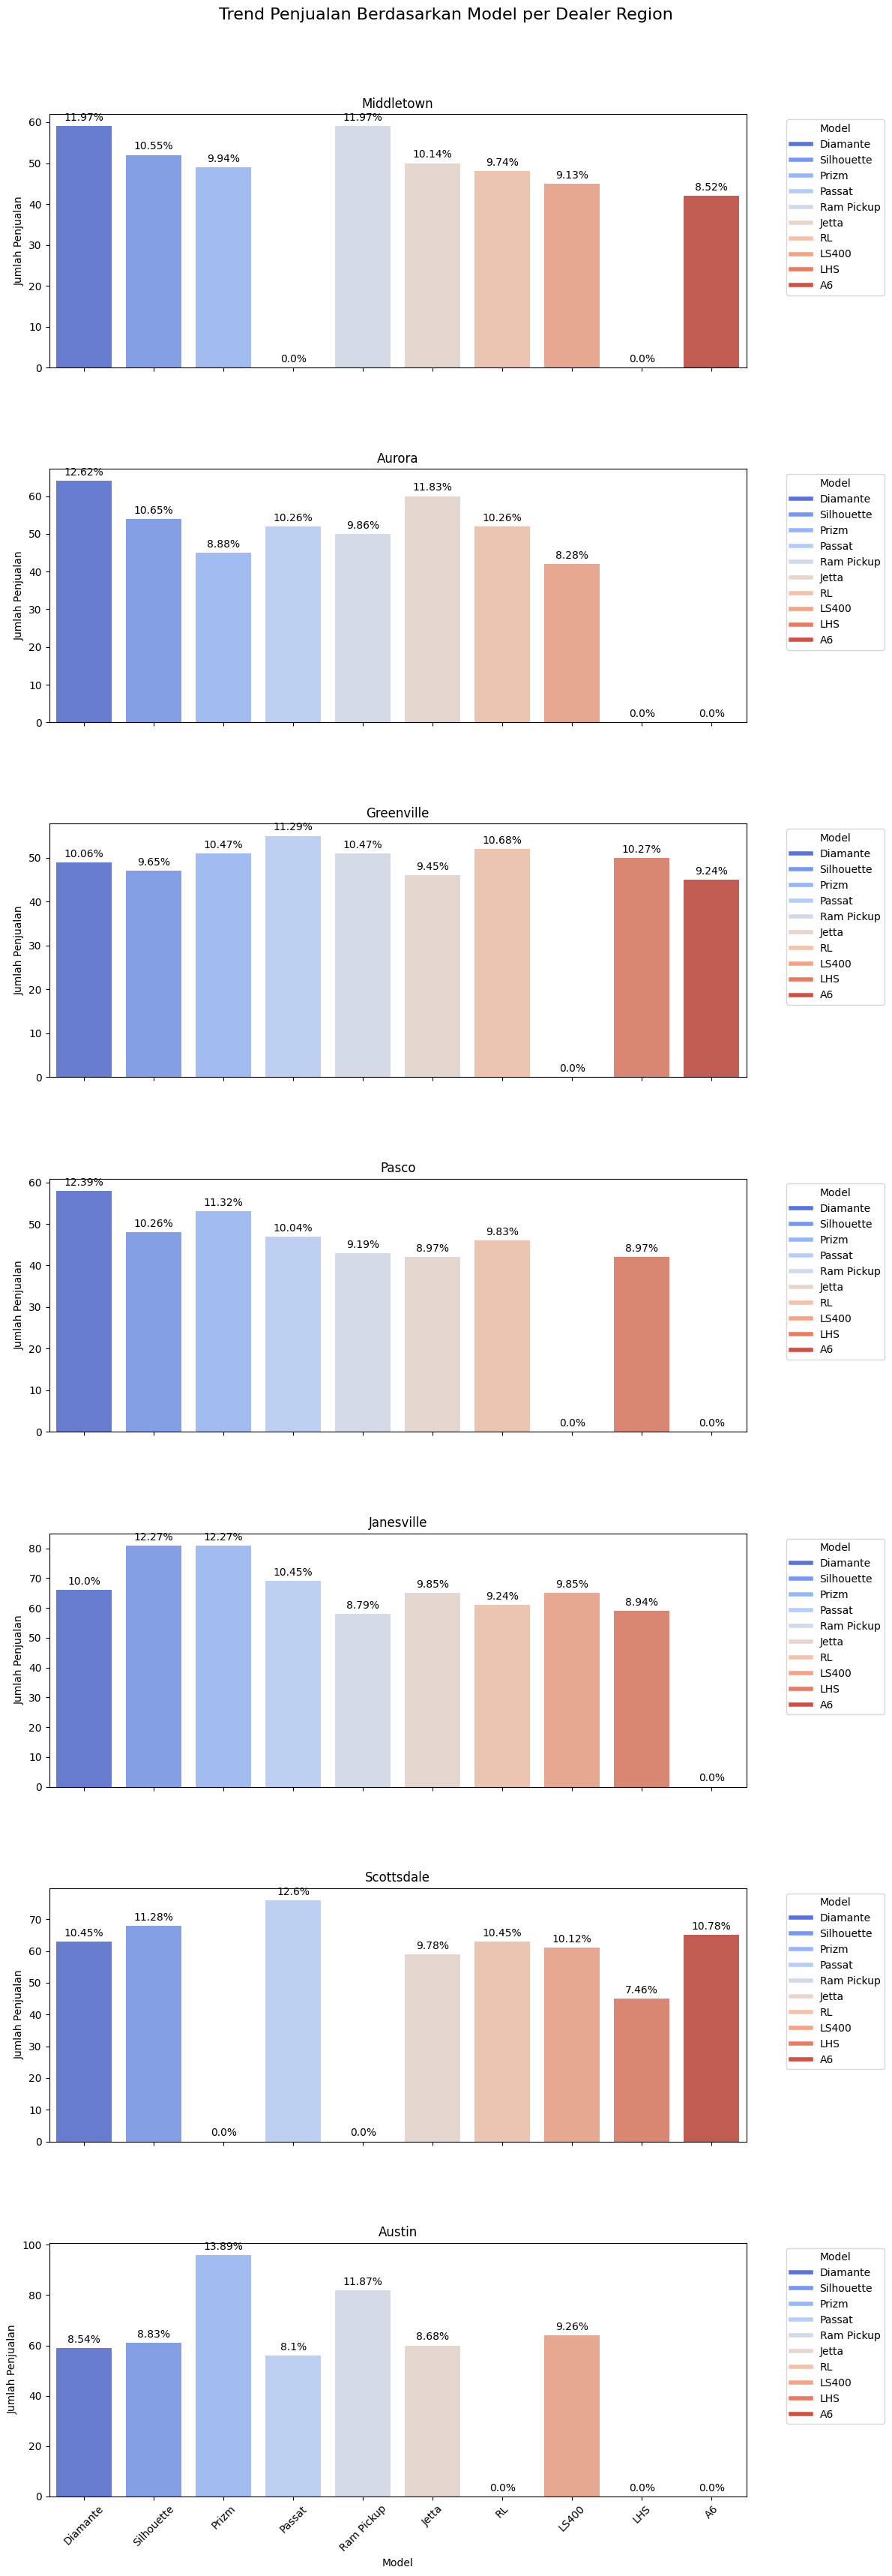

In [12]:
def top_10_counts(df, column_name):
    top_10 = df[column_name].value_counts().head(10)
    total = top_10.sum()
    percentages = (top_10 / total * 100).round(2)
    return top_10, percentages

def plot_bar(ax, top_data, percentages, title, model_order):
    num_colors = len(model_order)
    colors = sns.color_palette('coolwarm', num_colors)

    # Mengurutkan data sesuai dengan model_order
    top_data = top_data.reindex(model_order).fillna(0)
    percentages = percentages.reindex(model_order).fillna(0)

    bars = sns.barplot(x=top_data.index, y=top_data.values, ax=ax, palette=colors)
    ax.set_title(title)
    ax.set_xlabel('Model')
    ax.set_ylabel('Jumlah Penjualan')
    ax.tick_params(axis='x', rotation=45)
    for p, perc in zip(ax.patches, percentages):
        ax.annotate(f'{perc}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    # Menambahkan legend untuk color map
    handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(num_colors)]
    labels = [f'{cat}' for cat in model_order]
    ax.legend(handles, labels, title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mendapatkan urutan model dari seluruh data
all_models = df['Model'].value_counts().index.tolist()
model_order = all_models[:10]  # Pilih 10 model teratas jika diperlukan

# Buat subplot untuk tren penjualan berdasarkan model per dealer region
dealer_regions = df['Dealer_Region'].unique()
num_regions = len(dealer_regions)
fig, axes = plt.subplots(num_regions, 1, figsize=(12, 5 * num_regions), sharex=True)
fig.suptitle('Trend Penjualan Berdasarkan Model per Dealer Region', fontsize=16)

for ax, region in zip(axes, dealer_regions):
    region_df = df[df['Dealer_Region'] == region]
    top_model, perc_model = top_10_counts(region_df, 'Model')
    plot_bar(ax, top_model, perc_model, f'{region}', model_order)

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.4)  # Menambah jarak antar subplot
plt.show()

- Untuk daerah Aurora Model mobil yang paling banyak di minati adalah Diamante, Jetta dan Silhouette.
- Untuk daerah Austin Model mobil yang paling banyak di minati adalah Prizm, Ram Pickup dan Montero Sport.
- Untuk daerah Greenville Model mobil yang paling banyak di minati adalah Passat, RL dan Prizm.
- Untuk daerah Janesville Model mobil yang paling banyak di minati adalah Prizm, Silhouette dan Passat.
- Untuk daerah Middletown Model mobil yang paling banyak di minati adalah Diamante, Ram Pickup dan Silhouette.
- Untuk daerah Pasco Model mobil yang paling banyak di minati adalah Diamante, Prizm dan Silhouette.
- Untuk daerah Scottsdale Model mobil yang paling banyak di minati adalah Passat, Silhouette dan A6.


### Trend Penjualan Berdasarkan Gender per Dealer Region

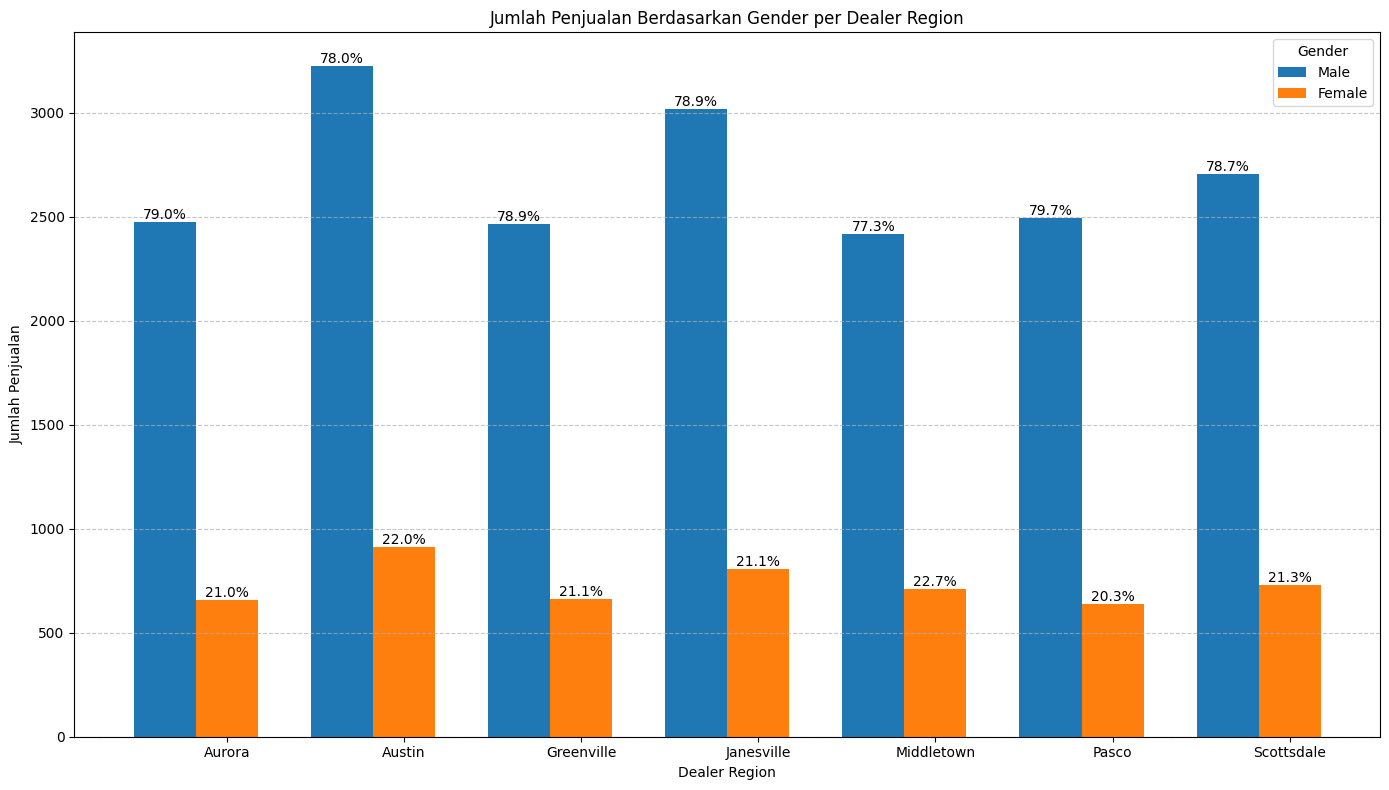

In [13]:
grouped = df.groupby(['Dealer_Region', 'Gender']).size().reset_index(name='Count')
top_models_per_region = grouped.groupby('Dealer_Region').apply(lambda x: x.nlargest(2, 'Count')).reset_index(drop=True)

total_sales_per_region = top_models_per_region.groupby('Dealer_Region')['Count'].sum().reset_index(name='Total_Sales')

top_models_per_region = top_models_per_region.merge(total_sales_per_region, on='Dealer_Region')

top_models_per_region['Percentage'] = (top_models_per_region['Count'] / top_models_per_region['Total_Sales']) * 100

plt.figure(figsize=(14, 8))

bar_width = 0.35
regions = top_models_per_region['Dealer_Region'].unique()
region_indices = np.arange(len(regions))

bars = {}

for i, gender in enumerate(['Male', 'Female']):
    gender_data = top_models_per_region[top_models_per_region['Gender'] == gender]
    bars[gender] = plt.bar(region_indices + i * bar_width, gender_data['Count'], width=bar_width, label=gender)

    for j, bar in enumerate(bars[gender]):
        height = bar.get_height()
        region = regions[j]
        percentage = gender_data[gender_data['Dealer_Region'] == region]['Percentage'].values[0]
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.1f}%',
                 ha='center', va='bottom')

plt.xticks(region_indices + bar_width, regions)
plt.title('Jumlah Penjualan Berdasarkan Gender per Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Jumlah Penjualan')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


- Hampir 80% dari pembeli ber jenis kelamin laki-laki untuk setiap dealer region.
- Dan sekitar 20% an pembeli berjenis kelamin perempuan untuk setiap dealer region.

### Analisis demografi ( Pengaruh Annual Income dengan Price atau harga mobil yang di beli )

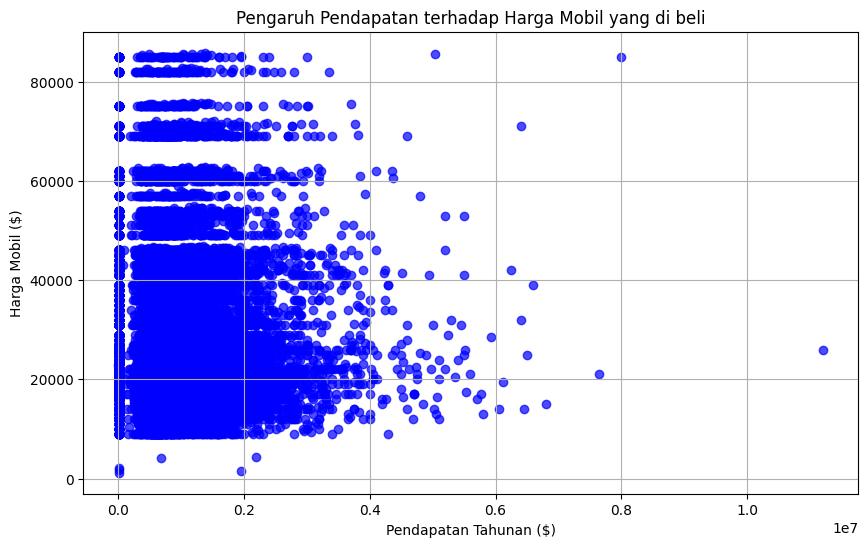

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income'], df['Price ($)'], color='blue', alpha=0.7)
plt.title('Pengaruh Pendapatan terhadap Harga Mobil yang di beli')
plt.xlabel('Pendapatan Tahunan ($)')
plt.ylabel('Harga Mobil ($)')
plt.grid(True)
plt.show()

Sepertinya tidak ada keterkaitan antara pendapatan tahunan komsumen dengan harga mobil yang di beli.

### Jumlah Penjualan Berdasarkan Date

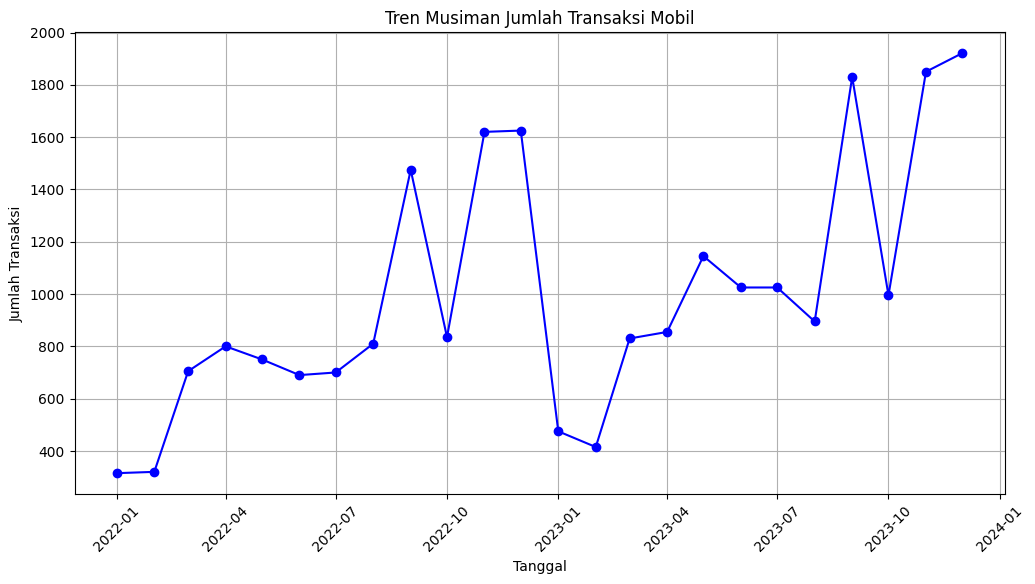

In [15]:

# Menghitung jumlah transaksi per bulan
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month').size()  # Menghitung jumlah transaksi

# Membuat plot tren musiman
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Tren Musiman Jumlah Transaksi Mobil')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()